# Part 1

## 1. Top-10 Reviewer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd_data = pd.read_csv('Reviews.csv')
pd_data = pd_data[:10000]
pd_data = pd_data.drop(['Id', 'ProductId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Text','Summary'], axis = 1)

In [3]:
score_count = pd.DataFrame(pd_data['UserId'].value_counts().reset_index())
score_count.columns = ['UserId', 'Score count']

temp = score_count.drop_duplicates()
temp = temp.head(10)
temp['Score mean'] = 0.0

In [4]:
merge = pd.merge(score_count, pd_data, on='UserId')
merge = merge[['UserId', 'ProfileName', 'Score count', 'Score']]
temp2 = merge[['UserId', 'ProfileName', 'Score count']].drop_duplicates().head(10)

In [5]:
for index, row in temp.iterrows():
    score_mean = merge[merge['UserId'] == row['UserId']][['Score']].sum() / row['Score count']
    temp.at[index, 'Score mean'] = score_mean

In [6]:
merge2 = pd.merge(temp2, temp)
merge2

,UserId,ProfileName,Score count,Score mean
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
5,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
7,A3TX6CWSZL02PW,"LaVerne "":LaVerne""",6,5.000000
8,AQQLWCMRNDFGI,Steven A. Peterson,6,4.166667
9,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


## 2. Plot score distribution for the user with the most number of view

In [7]:
import numpy as np

In [8]:
pd_data = pd.read_csv('Reviews.csv')
pd_data = pd_data[:10000]
pd_data = pd_data.drop(['Id', 'ProductId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Text','Summary'], axis = 1)

In [9]:
score_count = pd.DataFrame(pd_data['UserId'].value_counts().reset_index())
score_count.columns = ['UserId', 'Score count']
merge = pd.merge(score_count, pd_data, on='UserId')
merge = merge[['UserId', 'ProfileName', 'Score count', 'Score']]
view = score_count.iat[0,1]
merge = merge.head(view)

,UserId,ProfileName,Score count,Score
0,A1Z54EM24Y40LL,c2,17,5
1,A1Z54EM24Y40LL,c2,17,5
2,A1Z54EM24Y40LL,c2,17,5
3,A1Z54EM24Y40LL,c2,17,3
4,A1Z54EM24Y40LL,c2,17,4
5,A1Z54EM24Y40LL,c2,17,4
6,A1Z54EM24Y40LL,c2,17,5
7,A1Z54EM24Y40LL,c2,17,2
8,A1Z54EM24Y40LL,c2,17,5
9,A1Z54EM24Y40LL,c2,17,3


(array([1., 0., 1., 0., 0., 4., 0., 4., 0., 7.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

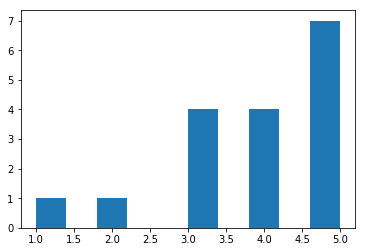

In [10]:
plt.hist(merge['Score'])

## 3. Plot pandas Series DataFrame(Time->Date)

In [11]:
pd_data = pd.read_csv('Reviews.csv')
pd_data = pd_data[:10000]

In [12]:
pd_data = pd_data.drop(['Id', 'ProductId','UserId', 'ProfileName', 'Score', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Text','Summary'], axis = 1)

In [13]:
pd_data['Time'] = pd.to_datetime(pd_data['Time'], unit='s')

Text(0.5, 1.0, 'Review count by year')

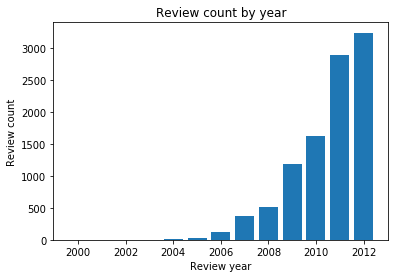

In [14]:
pd_data['year'] = pd_data['Time'].apply(lambda x: x.year)
review_count = pd.DataFrame(pd_data['year'].value_counts().reset_index())
review_count = review_count.rename(columns={'index': 'Review year', 'year': 'Review count'})
plt.bar(review_count['Review year'], review_count['Review count'])
plt.xlabel('Review year')
plt.ylabel('Review count')
plt.title('Review count by year')

## 4. Plot HeatMap using seaborn

In [15]:
import seaborn as sns

In [16]:
pd_data = pd.read_csv('Reviews.csv')
pd_data = pd_data[:10000]
pd_data = pd_data.drop(['ProductId', 'UserId', 'ProfileName', 'Text', 'Summary'], axis = 1)

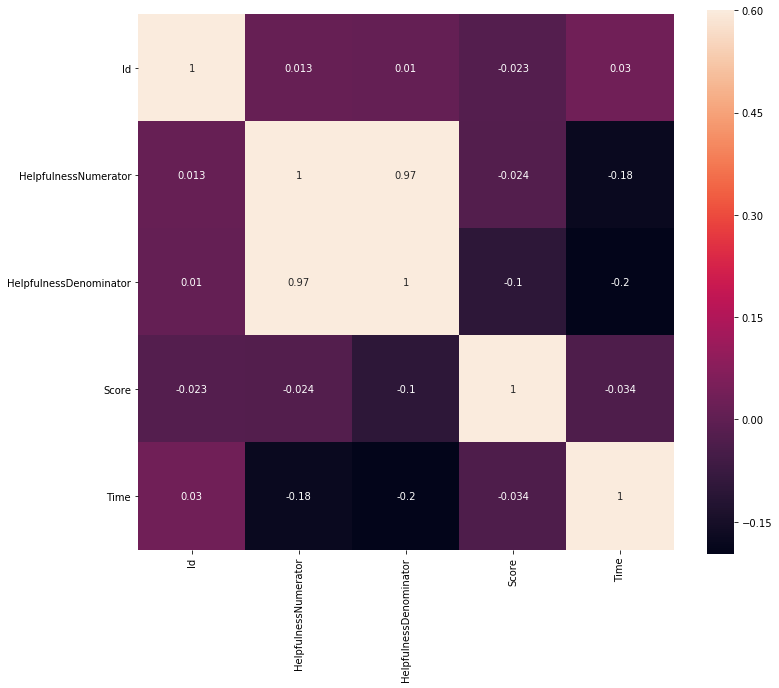

In [17]:
plt.figure(figsize=(12,10))
foo = sns.heatmap(pd_data.corr(), vmax=0.6, square=True, annot=True)

## 5. Helpful percent

In [18]:
pd_data = pd.read_csv('Reviews.csv')
pd_data = pd_data[:10000]
pd_data = pd_data.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'Text', 'Summary', 'Score', 'Time'], axis = 1)

In [19]:
pd_data['Ratio'] = 0.0
pd_data.loc[(pd_data['HelpfulnessNumerator'] == 0) & (pd_data['HelpfulnessDenominator'] == 0), ['Ratio']] = -1.0
pd_data.loc[(pd_data['HelpfulnessNumerator'] != 0) | (pd_data['HelpfulnessDenominator'] != 0), ['Ratio']] = pd_data['HelpfulnessNumerator'] / pd_data['HelpfulnessDenominator']

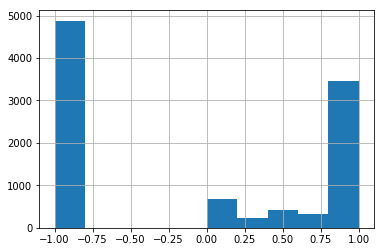

In [20]:
plt.hist(pd_data['Ratio'])
plt.grid(True)